In [1]:
# load data
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [3]:
data = pd.read_csv("adm_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


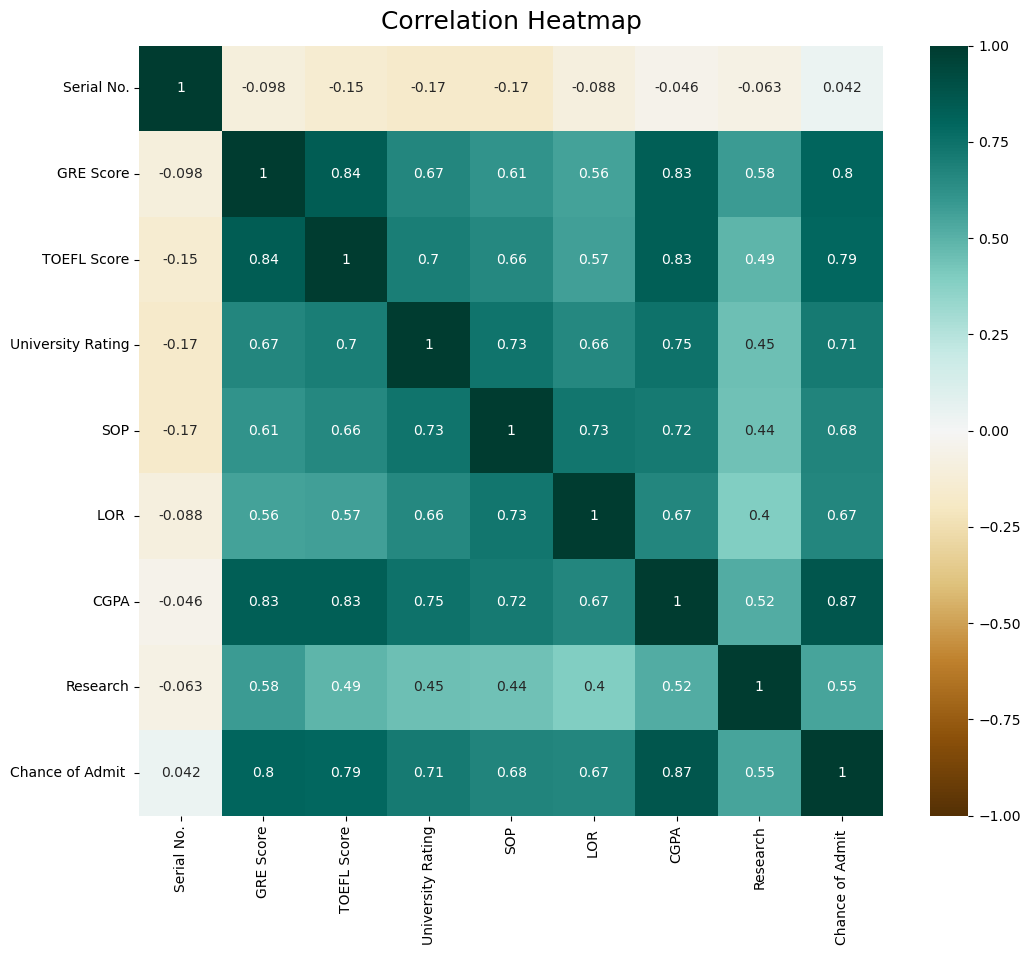

In [5]:
plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Text(0, 0.5, 'GRE Score')

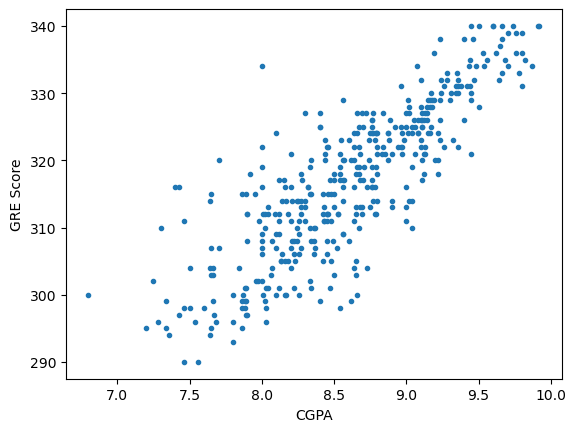

In [6]:
plt.scatter(data["CGPA"], data["GRE Score"], marker =".")
plt.xlabel("CGPA")
plt.ylabel("GRE Score")

In [7]:
# Define an array of new column names
new_column_names = ['no', 'gre_score', 'toefl_score', 'univ_rating', 'sop', 'lor', 'cgpa', 'research', 'coa']

# Rename the columns using the new names
data.columns = new_column_names

data

,no,gre_score,toefl_score,univ_rating,sop,lor,cgpa,research,coa
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
# Create OLS model object
model = smf.ols("gre_score ~ cgpa", data)

# Fit the model
results = model.fit()

results_gre = print_coef_std_err(results)

# Extract the R-squared
results.rsquared

0.6939897183180681

In [9]:
print(results.t_test([1,0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           178.9771      4.599     38.919      0.000     169.936     188.018


berdasarkan hasil t-test ini, kita dapat menyimpulkan bahwa koefisien c0 dalam model regresi signifikan secara statistik dan bukan nol. Selain itu, kita memiliki tingkat kepercayaan 95% bahwa nilai sebenarnya dari koefisien c0 berada dalam rentang 169.936 hingga 188.018. Ini mengindikasikan bahwa variabel independen yang sesuai dengan c0 memiliki dampak yang signifikan terhadap variabel gre_score.

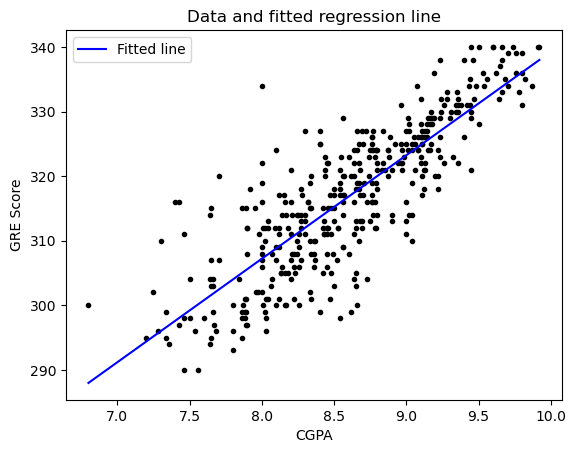

In [10]:
predictor = "cgpa"
outcome = "gre_score"
data_copy = data.copy()
results_ = results_gre.copy()

# Plot the data
plt.scatter(data_copy[predictor], data_copy[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data_copy[predictor]), np.max(data_copy[predictor]), len(data_copy))

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("GRE Score")
plt.xlabel("CGPA")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [11]:
results_gre

,coef,std err
Intercept,178.977147,4.598689
cgpa,16.028789,0.533520


$$𝑦=179+16𝑥$$

- Nilai GRE rata-rata calon mahasiswa/mahasiswi yang memiliki CGPA 0 adalah 179

Bisa juga didefinisikan sebagai berikut
$$𝑦=317+16(x-8.6)$$

- calon mahasiswa/mahasiswi yang memiliki CGPA rata rata mendapatkan nilai GRE 317
- Interpretasi koefisiennya adalah selisih nilai GRE antara dua orang yang mempunyai CGPA berbeda satu poin adalah 16 dengan orang yang lebih tinggi mempunyai nilai GRE lebih tinggi

In [26]:
cgpa = np.array([2, 5, 10])

prediction_results = pd.DataFrame(data = {"cgpa": cgpa})
prediction_results

,cgpa
0,2
1,5
2,10


In [30]:
# Prediction results
prediction_results["pred_gre"] = results.predict(prediction_results["cgpa"]).astype(int)

prediction_results

,cgpa,pred_gre
0,2,211
1,5,259
2,10,339


In [14]:
# Create OLS model object
model_coa = smf.ols("coa ~ gre_score + toefl_score", data)

# Fit the model
results_coa = model_coa.fit()

results_gre_coa = print_coef_std_err(results_coa)

# Extract the R-squared
results_coa.rsquared

0.6925050125146581

In [15]:
results_gre_coa

,coef,std err
Intercept,-2.128397,0.116374
gre_score,0.005814,0.000630
toefl_score,0.009412,0.001192


$$Chance of Admit=-2.1+0.006gre+0.009toefl$$

- Dalam data ini, calon mahasiswa yang mempunyai nilai toefl sama dan nilai GRE lebih tinggi 1 poin akan menambah kesempatan lolos sebanyak 0.6%.
- Calon mahasiswa yang mempunyai nilai GRE sama dan nilai toefl lebih tinggi 1 poin akan menambah kesempatan lolos sebanyak 0.9%.

In [31]:
# Define a function to minimize
def objective(x):
    gre_score, toefl_score = x
    predicted_coa = results_coa.predict({'gre_score': gre_score, 'toefl_score': toefl_score})
    return abs(predicted_coa[0] - 0.8) # Minimize the absolute difference from 0.8

# Initial guess for gre_score and toefl_score
initial_guess = [320, 100]

# Minimize the objective function
optimized_scores = minimize(objective, initial_guess, bounds=[(0, 340), (0, 120)])

# Extract the optimal values
optimal_gre_score, optimal_toefl_score = optimized_scores.x

print(f"Optimal gre_score: {int(np.round(optimal_gre_score))}")
print(f"Optimal toefl_score: {int(np.round(optimal_toefl_score))}")

Optimal gre_score: 326
Optimal toefl_score: 110


In [33]:
gre_score = np.array([310, 326, 340])
toefl_score = np.array([100, 110, 120])

prediction_results = pd.DataFrame(data = {"gre_score": gre_score, "toefl_score" : toefl_score})
prediction_results

,gre_score,toefl_score
0,310,100
1,326,110
2,340,120


In [34]:
# Prediction results
prediction_results["pred_coa"] = (np.round(results_coa.predict(prediction_results) * 100, 2)).astype(str) + '%'

prediction_results

,gre_score,toefl_score,pred_coa
0,310,100,61.5%
1,326,110,80.22%
2,340,120,97.77%
